In [80]:
# Install pytorch
!pip install torch torchvision
!pip install gdown


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python3.12 -m pip install --upgrade pip
  Obtaining dependency information for gdown from https://files.pythonhosted.org/packages/54/70/e07c381e6488a77094f04c85c9caf1c8008cdc30778f7019bc52e5285ef0/gdown-5.2.0-py3-none-any.whl.metadata

[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python3.12 -m pip install --upgrade pip


In [84]:
import os
import pathlib
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
from PIL import Image
from itertools import islice

np.set_printoptions(precision=3)
print(torch.__version__)

2.3.0


In [3]:
# Get device, either GPU or CPU
device = "cpu"
if torch.backends.mps.is_available():
    device = "mps"
elif torch.cuda.is_available():
    device = "cuda"
print(f"Running on device: {device}")

Running on device: mps


# Creating tensors

In [7]:
a = [1, 2, 3]
b = np.array([4, 5, 6], dtype=np.int32)
t_a = torch.tensor(a)
t_b = torch.from_numpy(b)
print(t_a)
print(t_b)

tensor([1, 2, 3])
tensor([4, 5, 6], dtype=torch.int32)


In [11]:
# Creating a tensor of ones
t_ones = torch.ones(2, 3)
print(t_ones.shape)
print(t_ones)

# Creating a random tensor
rand_tensor = torch.rand(2, 3)
print(rand_tensor)

torch.Size([2, 3])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0.7422, 0.5718, 0.4695],
        [0.9607, 0.8393, 0.7780]])


In [12]:
# Changing datatype
t_a_new = t_a.to(torch.int64)
print(t_a_new)

tensor([1, 2, 3])


In [14]:
# Transposing a tensor
t = torch.rand(3, 5)
t_tr = torch.transpose(t, dim0=0, dim1=1)
print(t.shape, ' --> ', t_tr.shape)

torch.Size([3, 5])  -->  torch.Size([5, 3])


In [15]:
# Reshaping a tensor
t = torch.zeros(30)
t_reshape = t.reshape(5, 6)
print(t_reshape.shape)

torch.Size([5, 6])


In [17]:
# Removing unnecessary dimensions
t = torch.zeros(1, 2, 1, 4, 1)
t_sqz = torch.squeeze(t, dim=2)
print(t.shape, ' --> ', t_sqz.shape)

torch.Size([1, 2, 1, 4, 1])  -->  torch.Size([1, 2, 4, 1])


# Mathematical operations

In [19]:
torch.manual_seed(1)
t1 = 2 * torch.rand(5, 2) - 1  # Uniform distribution between -1 and 1
t2 = torch.normal(mean=0, std=1, size=(5, 2))  # Normal distribution with mean 0 and std 1

In [20]:
# Element-wise multiplication
t3 = torch.multiply(t1, t2)
print(t3)

tensor([[ 0.4426, -0.3114],
        [ 0.0660, -0.5970],
        [ 1.1249,  0.0150],
        [ 0.1569,  0.7107],
        [-0.0451, -0.0352]])


In [22]:
# Mean of each column
t4 = torch.mean(t1, dim=0)
print(t4)

tensor([-0.1373,  0.2028])


In [24]:
# Matrix-matrix product
t5 = torch.matmul(t1, torch.transpose(t2, 0, 1))
print(t5)

t6 = torch.matmul(torch.transpose(t1, 0, 1), t2)
print(t6)

tensor([[ 0.1312,  0.3860, -0.6267, -1.0096, -0.2943],
        [ 0.1647, -0.5310,  0.2434,  0.8035,  0.1980],
        [-0.3855, -0.4422,  1.1399,  1.5558,  0.4781],
        [ 0.1822, -0.5771,  0.2585,  0.8676,  0.2132],
        [ 0.0330,  0.1084, -0.1692, -0.2771, -0.0804]])
tensor([[ 1.7453,  0.3392],
        [-1.6038, -0.2180]])


In [28]:
# Norm of a tensor (L2 norm) 
norm_t1 = torch.linalg.norm(t1, ord=2, dim=1)
print('Linalg', norm_t1)

# Manual way
man_norm_t1 = np.sqrt(np.sum(np.square(t1.numpy()), axis=1))
print('Manual', man_norm_t1)

Linalg tensor([0.6785, 0.5078, 1.1162, 0.5488, 0.1853])
Manual [0.678 0.508 1.116 0.549 0.185]


In [32]:
# Splitting a tensor using chunk
torch.manual_seed(1)
t = torch.rand(6)
print(t)

# Chunks is the number of equal-sized tensors to split the original tensor into
t_splits = torch.chunk(t, chunks=3)
[item.numpy() for item in t_splits]

tensor([0.7576, 0.2793, 0.4031, 0.7347, 0.0293, 0.7999])


[array([0.758, 0.279], dtype=float32),
 array([0.403, 0.735], dtype=float32),
 array([0.029, 0.8  ], dtype=float32)]

In [34]:
# Splitting a tensor using split
torch.manual_seed(1)
t = torch.rand(5)
print(t)

# Split the original tensor into two tensors, one sized 3 and the other sized 2
t_splits = torch.split(t, split_size_or_sections=[3, 2])
[item.numpy() for item in t_splits]

tensor([0.7576, 0.2793, 0.4031, 0.7347, 0.0293])


[array([0.758, 0.279, 0.403], dtype=float32),
 array([0.735, 0.029], dtype=float32)]

In [37]:
# Concatenating tensors
A = torch.ones(3)
B = torch.zeros(2)
C = torch.cat([A, B], dim=0)
print(C)

tensor([1., 1., 1., 0., 0.])


In [46]:
# Stacking tensors
A = torch.ones(3)
B = torch.zeros(3)

S_row = torch.stack([A, B], dim=0)
print(f'Row\n{S_row}')

S_col = torch.stack([A, B], dim=1)
print(f'Col\n{S_col}')

Row
tensor([[1., 1., 1.],
        [0., 0., 0.]])
Col
tensor([[1., 0.],
        [1., 0.],
        [1., 0.]])


# Building input data

In [49]:
# Create a tensor with values from 0 to 5
t = torch.arange(6, dtype=torch.float32)
data_loader = DataLoader(t)

# Iterate element per element
for item in data_loader:
    print(item)

tensor([0.])
tensor([1.])
tensor([2.])
tensor([3.])
tensor([4.])
tensor([5.])


In [54]:
# Iterate in batches

# Drop_last is useful when the last batch is smaller than the batch size
data_loader = DataLoader(t, batch_size=3, drop_last=False)
for i, batch in enumerate(data_loader, start=1):
    print(f'Batch {i}:', batch)

Batch 1: tensor([0., 1., 2.])
Batch 2: tensor([3., 4., 5.])


In [61]:
# Combining two tensors (features and labels)
torch.manual_seed(1)
t_x = torch.rand([4, 3], dtype=torch.float32)
t_y = torch.arange(4)

class JointDataset(Dataset):
    
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

print("Using custom dataset")
joint_dataset = JointDataset(t_x, t_y)
for example in joint_dataset:
    print('   x: ', example[0], '   y: ', example[1])

# Could use the torch implementation TensorDataset too
print("Using torch dataset")
joint_dataset = TensorDataset(t_x, t_y)
for example in joint_dataset:
    print('   x: ', example[0], '   y: ', example[1])

Using custom dataset
   x:  tensor([0.7576, 0.2793, 0.4031])    y:  tensor(0)
   x:  tensor([0.7347, 0.0293, 0.7999])    y:  tensor(1)
   x:  tensor([0.3971, 0.7544, 0.5695])    y:  tensor(2)
   x:  tensor([0.4388, 0.6387, 0.5247])    y:  tensor(3)
Using torch dataset
   x:  tensor([0.7576, 0.2793, 0.4031])    y:  tensor(0)
   x:  tensor([0.7347, 0.0293, 0.7999])    y:  tensor(1)
   x:  tensor([0.3971, 0.7544, 0.5695])    y:  tensor(2)
   x:  tensor([0.4388, 0.6387, 0.5247])    y:  tensor(3)


In [66]:
# Shuffling
torch.manual_seed(1)
data_loader = DataLoader(dataset=joint_dataset, batch_size=2, shuffle=True)

for i, batch in enumerate(data_loader, 1):
    print(f'batch {i}:', 'x:', batch[0], '\n         y:', batch[1])
    
# Re-iterating for epochs
print('\nRe-iterating for epochs')
for epoch in range(2):
    print(f'Epoch {epoch + 1}')
    for i, batch in enumerate(data_loader, 1):
        print(f'batch {i}:', 'x:', batch[0], '\n         y:', batch[1])

batch 1: x: tensor([[0.3971, 0.7544, 0.5695],
        [0.7576, 0.2793, 0.4031]]) 
         y: tensor([2, 0])
batch 2: x: tensor([[0.7347, 0.0293, 0.7999],
        [0.4388, 0.6387, 0.5247]]) 
         y: tensor([1, 3])

Re-iterating for epochs
Epoch 1
batch 1: x: tensor([[0.7576, 0.2793, 0.4031],
        [0.3971, 0.7544, 0.5695]]) 
         y: tensor([0, 2])
batch 2: x: tensor([[0.7347, 0.0293, 0.7999],
        [0.4388, 0.6387, 0.5247]]) 
         y: tensor([1, 3])
Epoch 2
batch 1: x: tensor([[0.4388, 0.6387, 0.5247],
        [0.3971, 0.7544, 0.5695]]) 
         y: tensor([3, 2])
batch 2: x: tensor([[0.7576, 0.2793, 0.4031],
        [0.7347, 0.0293, 0.7999]]) 
         y: tensor([0, 1])


# Processing images stored locally

In [68]:
imgdir_path = pathlib.Path('cat_dog_images')
file_list = sorted([str(path) for path in imgdir_path.glob('*.jpg')])
print(file_list)

['cat_dog_images/cat-01.jpg', 'cat_dog_images/cat-02.jpg', 'cat_dog_images/cat-03.jpg', 'cat_dog_images/dog-01.jpg', 'cat_dog_images/dog-02.jpg', 'cat_dog_images/dog-03.jpg']


Image shape: (900, 1200, 3)
Image shape: (900, 1200, 3)
Image shape: (900, 742, 3)
Image shape: (800, 1200, 3)
Image shape: (800, 1200, 3)
Image shape: (900, 1200, 3)


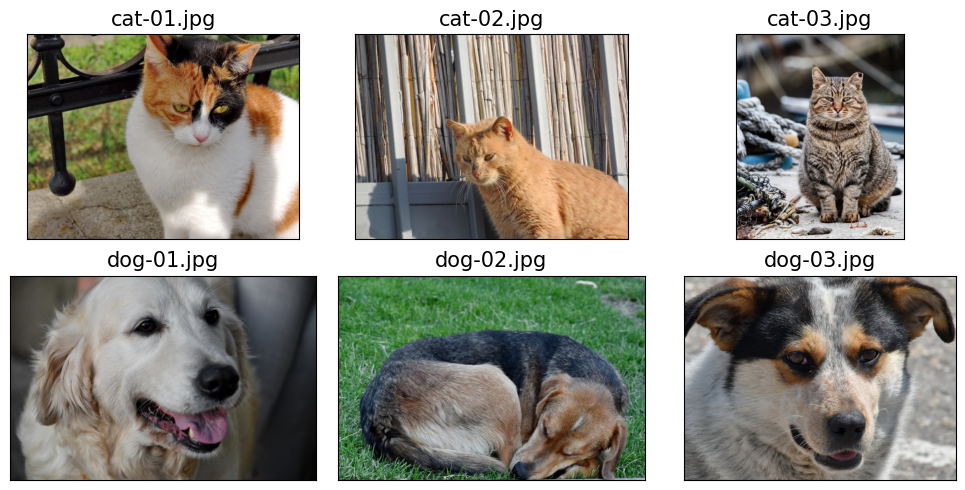

In [70]:
fig = plt.figure(figsize=(10, 5))
for i, file in enumerate(file_list):
    img = Image.open(file)
    print("Image shape:", np.array(img).shape)
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([]) 
    ax.set_yticks([])
    ax.imshow(img)
    ax.set_title(os.path.basename(file), size=15)
plt.tight_layout()
plt.show()

In [71]:
labels = [1 if 'dog' in os.path.basename(file) else 0 for file in file_list]
print(labels)

[0, 0, 0, 1, 1, 1]


In [74]:
class ImageDataset(Dataset):
    
    def __init__(self, file_list, labels, transform=None):
        self.file_list = file_list
        self.labels = labels
        self.transform = transform
    
    def __getitem__(self, index):
        img = Image.open(self.file_list[index])
        if self.transform:
            img = self.transform(img)
        label = self.labels[index]
        return img, label
    
    def __len__(self):
        return len(self.labels)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


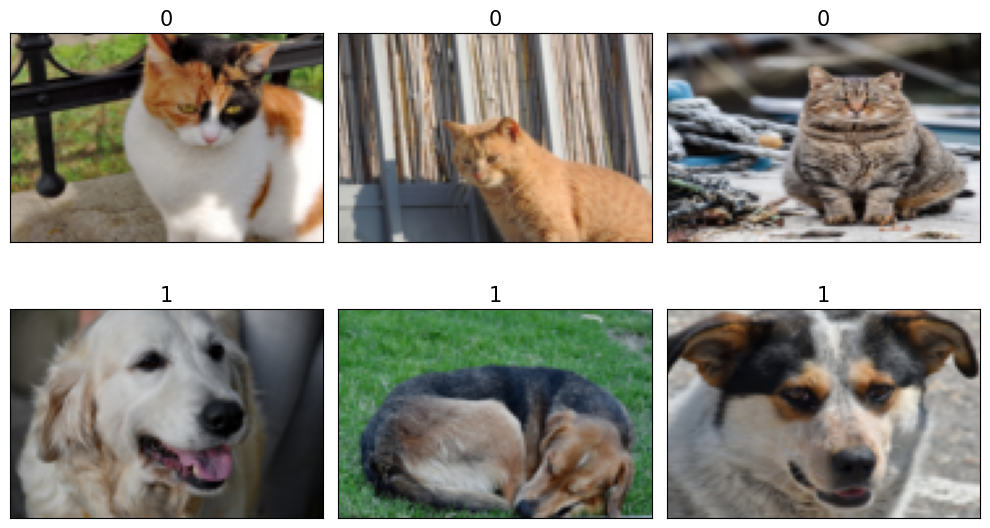

In [77]:
img_height, img_width = 80, 120
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((img_height, img_width)),
])


image_dataset = ImageDataset(file_list, labels, transform)

fig = plt.figure(figsize=(10, 6))
for i, example in enumerate(image_dataset):
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([]) 
    ax.set_yticks([])
    ax.imshow(example[0].numpy().transpose((1, 2, 0)))
    ax.set_title(f'{example[1]}', size=15)

plt.tight_layout()
plt.show()

# Torchvision Celeba dataset

In [83]:
image_path = "./"
celeba_dataset = torchvision.datasets.CelebA(
    image_path, split='train', target_type='attr', download=True)

Files already downloaded and verified


In [85]:
assert isinstance(celeba_dataset, torch.utils.data.Dataset)
example = next(iter(celeba_dataset))
print(example)

(<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=178x218 at 0x169BCCFB0>, tensor([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1]))


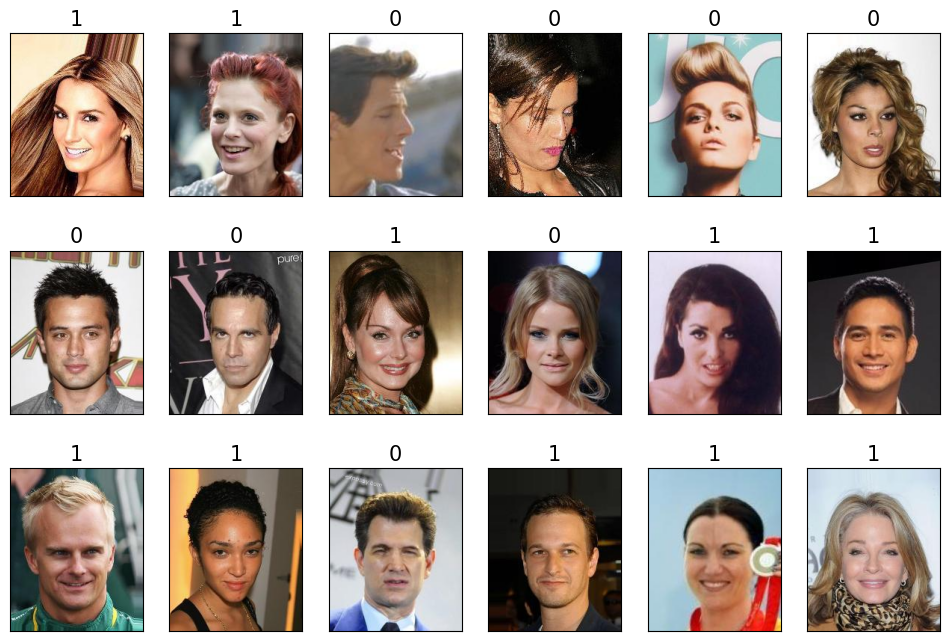

In [86]:
smiling_attr_idx = 31
fig = plt.figure(figsize=(12, 8))
for i, (image, attributes) in islice(enumerate(celeba_dataset), 18):
    ax = fig.add_subplot(3, 6, i+1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(image)
    ax.set_title(f'{attributes[smiling_attr_idx]}', size=15)
plt.show()

# Torchvision MNIST dataset

(<PIL.Image.Image image mode=L size=28x28 at 0x169BCE570>, 5)


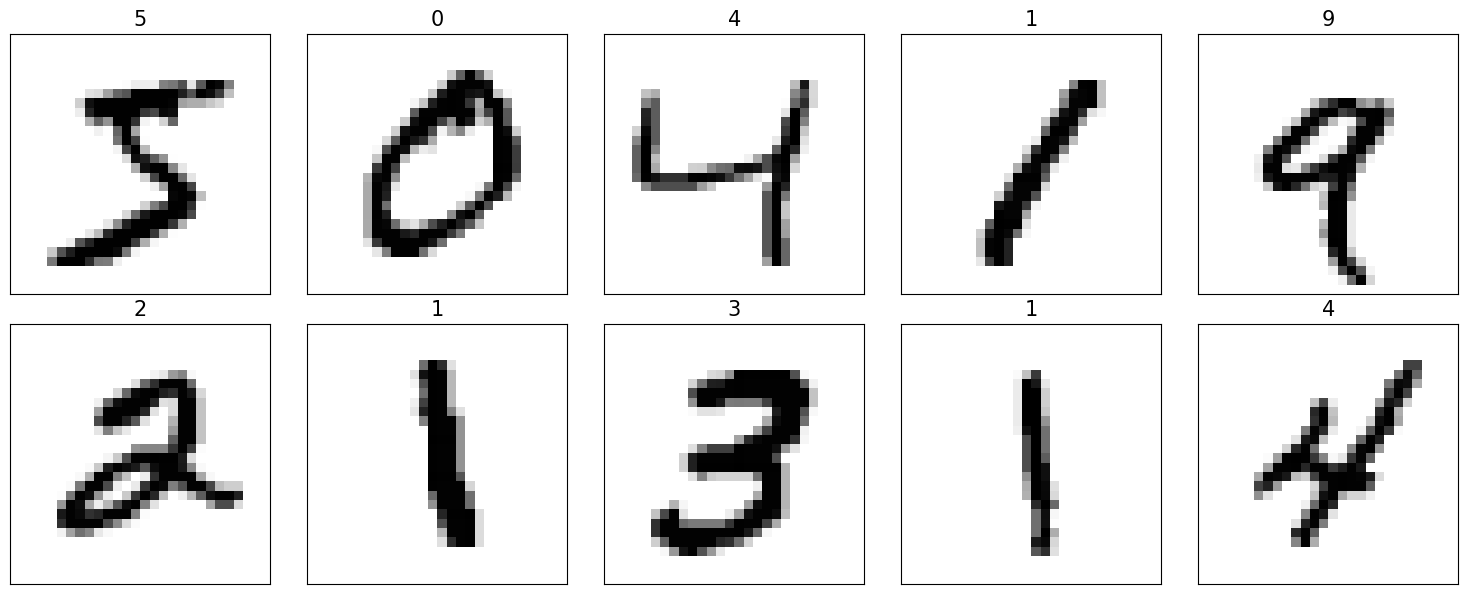

In [90]:
mnist_dataset = torchvision.datasets.MNIST(image_path, 'train', download=True)

assert isinstance(mnist_dataset, torch.utils.data.Dataset)
example = next(iter(mnist_dataset))
print(example)

fig = plt.figure(figsize=(15, 6))
for i, (image, label) in islice(enumerate(mnist_dataset), 10):
    ax = fig.add_subplot(2, 5, i+1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(image, cmap='gray_r')
    ax.set_title(f'{label}', size=15)
plt.tight_layout()
plt.show()